In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
table_data = pd.read_csv("./팀별 데이터.csv")

In [3]:
table_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   시즌         45 non-null     object 
 1   순위         45 non-null     int64  
 2   팀          45 non-null     object 
 3   승점         45 non-null     int64  
 4   승          45 non-null     int64  
 5   패          45 non-null     int64  
 6   득세트        45 non-null     int64  
 7   실세트        45 non-null     int64  
 8   세트득실률      45 non-null     float64
 9   득점         45 non-null     int64  
 10  실점         45 non-null     int64  
 11  점수득실률      45 non-null     float64
 12  연속         45 non-null     object 
 13  공격_순위      45 non-null     int64  
 14  경기수        45 non-null     int64  
 15  세트수        45 non-null     int64  
 16  공격_시도      45 non-null     int64  
 17  공격_성공      45 non-null     int64  
 18  공격차단       45 non-null     int64  
 19  공격_범실      45 non-null     int64  
 20  공격_성공률     4

In [4]:
table_data.shape

(45, 34)

In [5]:
# '연속' 컬럼에서 승/패와 그 횟수를 추출하여 수치로 변환
def convert_streak(streak):
    if '승' in streak:
        return int(streak.replace('승', ''))  # 승리 연승
    elif '패' in streak:
        return -int(streak.replace('패', ''))  # 패배 연패

In [6]:
# 변환된 결과를 새로운 컬럼 '연속_수치'에 추가
table_data['연속_수치'] = table_data['연속'].apply(convert_streak)

# 결과 출력
table_data["연속_수치"]

0     1
1     2
2    -2
3    -3
4     2
5    -1
6    -1
7     3
8    -3
9     4
10    1
11   -2
12   -2
13    1
14    1
15    1
16    3
17   -1
18    1
19   -2
20   -3
21   -1
22   -2
23   -1
24    1
25    2
26   -1
27    1
28   -1
29    4
30    1
31   -2
32   -8
33    1
34   -1
35   -1
36    1
37   -2
38    1
39   -1
40    3
41   -6
42    1
43   -1
44    1
Name: 연속_수치, dtype: int64

In [7]:
table_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   시즌         45 non-null     object 
 1   순위         45 non-null     int64  
 2   팀          45 non-null     object 
 3   승점         45 non-null     int64  
 4   승          45 non-null     int64  
 5   패          45 non-null     int64  
 6   득세트        45 non-null     int64  
 7   실세트        45 non-null     int64  
 8   세트득실률      45 non-null     float64
 9   득점         45 non-null     int64  
 10  실점         45 non-null     int64  
 11  점수득실률      45 non-null     float64
 12  연속         45 non-null     object 
 13  공격_순위      45 non-null     int64  
 14  경기수        45 non-null     int64  
 15  세트수        45 non-null     int64  
 16  공격_시도      45 non-null     int64  
 17  공격_성공      45 non-null     int64  
 18  공격차단       45 non-null     int64  
 19  공격_범실      45 non-null     int64  
 20  공격_성공률     4

In [8]:
df = table_data.drop(["시즌", "팀", "연속"], axis = 1)
cor_cols = df.columns[1:]
df_corr = df[cor_cols].corr()
df_corr

,승점,승,패,득세트,실세트,세트득실률,득점,실점,점수득실률,공격_순위,...,서브_세트당평균,블로킹_순위,블로킹_시도,블로킹_성공,블로킹_유효블락,블로킹_실패,블로킹_범실,블로킹_어시스트,블로킹_세트당평균,연속_수치
승점,1.000000,0.993334,-0.854801,0.978034,-0.778300,0.912345,0.606458,-0.017267,0.937824,-0.625723,...,0.367800,-0.540572,0.422534,0.559197,0.430127,0.220084,-0.046894,0.475696,0.539439,0.334552
승,0.993334,1.000000,-0.868266,0.973874,-0.781593,0.913472,0.595104,-0.023463,0.929965,-0.637556,...,0.372547,-0.533152,0.406976,0.537384,0.424709,0.197951,-0.045095,0.454179,0.518163,0.330783
패,-0.854801,-0.868266,1.000000,-0.794738,0.971076,-0.903871,-0.161387,0.482709,-0.926164,0.702519,...,-0.600372,0.579480,0.022708,-0.224057,-0.048961,0.247264,0.191757,-0.148609,-0.453989,-0.273328
득세트,0.978034,0.973874,-0.794738,1.000000,-0.689009,0.864261,0.717082,0.120936,0.910774,-0.583397,...,0.266704,-0.535975,0.530105,0.624729,0.528879,0.336947,0.026343,0.550191,0.518378,0.359257
실세트,-0.778300,-0.781593,0.971076,-0.689009,1.000000,-0.878351,0.003915,0.631646,-0.891537,0.689710,...,-0.684208,0.522437,0.178977,-0.090526,0.095017,0.389401,0.279306,-0.018875,-0.408414,-0.263628
세트득실률,0.912345,0.913472,-0.903871,0.864261,-0.878351,1.000000,0.342410,-0.276048,0.932179,-0.632646,...,0.534146,-0.494854,0.158806,0.326959,0.219514,-0.050992,-0.168276,0.266936,0.442188,0.369488
득점,0.606458,0.595104,-0.161387,0.717082,0.003915,0.342410,1.000000,0.770464,0.412346,-0.154106,...,-0.281475,-0.240233,0.905289,0.789254,0.813690,0.837867,0.301629,0.759869,0.349236,0.225852
실점,-0.017267,-0.023463,0.482709,0.120936,0.631646,-0.276048,0.770464,1.000000,-0.258112,0.312365,...,-0.648279,0.164334,0.811255,0.537681,0.697205,0.891190,0.405446,0.558074,-0.007960,0.017516
점수득실률,0.937824,0.929965,-0.926164,0.910774,-0.891537,0.932179,0.412346,-0.258112,1.000000,-0.676475,...,0.504863,-0.604503,0.212623,0.427268,0.233401,-0.001896,-0.134233,0.363623,0.544852,0.341826
공격_순위,-0.625723,-0.637556,0.702519,-0.583397,0.689710,-0.632646,-0.154106,0.312365,-0.676475,1.000000,...,-0.474538,0.234694,0.101866,-0.035182,0.126777,0.174646,0.201870,-0.008798,-0.141510,-0.141564


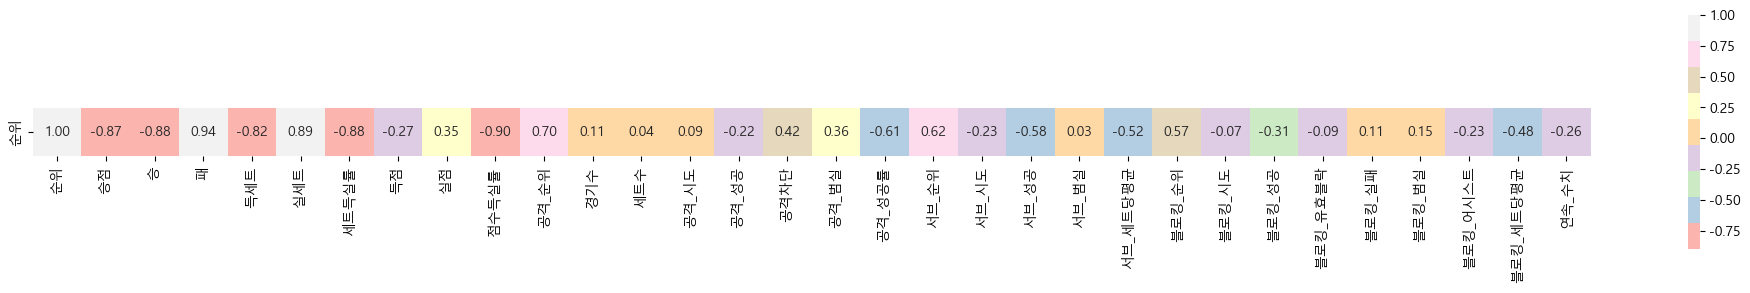

In [9]:
# 한글 폰트 설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False  # 음수 기호 정상 표시

# df는 "시즌", "팀", "연속"을 제외한 데이터프레임
df = table_data.drop(["시즌", "팀", "연속"], axis=1)

# "순위"와 나머지 모든 컬럼 간의 상관 행렬 계산
cor_cols = df.columns  # "순위"를 포함한 모든 컬럼
df_corr = df[cor_cols].corr()

# '순위' 컬럼과 나머지 컬럼들 간의 상관계수만 추출
corr_with_rank = df_corr[['순위']]  # '순위'와 다른 컬럼들의 상관계수만 추출

# 시각화
plt.figure(figsize=(20, 3))  # 사이즈 조정

# 상관 행렬 시각화 (heatmap)
hm = sns.heatmap(corr_with_rank.T, cbar=True, annot=True, square=True, fmt=".2f",
                 annot_kws={"size": 10}, yticklabels=corr_with_rank.columns, 
                 xticklabels=corr_with_rank.index, cmap='Pastel1')  # 색상 팔레트 변경

plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300)
plt.show()

In [10]:
print(corr_with_rank)

                 순위
순위         1.000000
승점        -0.871195
승         -0.880531
패          0.935345
득세트       -0.819794
실세트        0.892668
세트득실률     -0.877686
득점        -0.265030
실점         0.349977
점수득실률     -0.899046
공격_순위      0.700255
경기수        0.111772
세트수        0.038984
공격_시도      0.085524
공격_성공     -0.217208
공격차단       0.418273
공격_범실      0.359604
공격_성공률    -0.613861
서브_순위      0.617347
서브_시도     -0.225734
서브_성공     -0.579151
서브_범실      0.028115
서브_세트당평균  -0.519513
블로킹_순위     0.572704
블로킹_시도    -0.071070
블로킹_성공    -0.313507
블로킹_유효블락  -0.085825
블로킹_실패     0.110250
블로킹_범실     0.152332
블로킹_어시스트  -0.234782
블로킹_세트당평균 -0.479269
연속_수치     -0.263193


In [11]:
df = table_data

In [12]:
drop_list = ["시즌", "연속", "득점", "실점", "경기수", "세트수", "공격_시도", "공격_성공", "공격차단", "공격_범실", "서브_시도", "서브_성공", "서브_범실", "서브_세트당평균", "블로킹_순위", "블로킹_시도", "블로킹_성공", "블로킹_유효블락", "블로킹_실패", "블로킹_범실", "블로킹_어시스트", "블로킹_세트당평균", "연속_수치"]
df = df.drop(columns = drop_list)

In [13]:
df

,순위,팀,승점,승,패,득세트,실세트,세트득실률,점수득실률,공격_순위,공격_성공률,서브_순위
0,1,현대건설,80,26,10,90,51,1.765,1.077,2,42.38,4
1,2,흥국생명,79,28,8,93,47,1.979,1.089,4,40.30,2
2,3,정관장,61,20,16,74,63,1.175,1.034,1,42.54,3
3,4,GS칼텍스,51,18,18,63,69,0.913,0.994,3,42.14,1
4,5,IBK기업은행,51,17,19,70,71,0.986,1.013,6,37.94,5
5,6,한국도로공사,39,12,24,58,85,0.682,0.946,5,39.66,6
6,7,페퍼저축은행,17,5,31,39,101,0.386,0.865,7,37.11,7
7,1,흥국생명,82,27,9,93,44,2.114,1.109,1,40.99,1
8,2,현대건설,70,24,12,87,56,1.554,1.079,4,39.75,2
9,3,한국도로공사,60,20,16,77,67,1.149,1.015,5,36.28,5


In [14]:
# '팀'을 수치형 데이터로 변환 (예: '팀A' → 0, '팀B' → 1, '팀C' → 2)
team_mapping = {team: i for i, team in enumerate(df['팀'].unique())}
df['팀'] = df['팀'].map(team_mapping)

In [15]:
x = df.drop("순위", axis = 1)  # 독립 변수
y = df["순위"]  # 종속 변수

In [16]:
df

,순위,팀,승점,승,패,득세트,실세트,세트득실률,점수득실률,공격_순위,공격_성공률,서브_순위
0,1,0,80,26,10,90,51,1.765,1.077,2,42.38,4
1,2,1,79,28,8,93,47,1.979,1.089,4,40.30,2
2,3,2,61,20,16,74,63,1.175,1.034,1,42.54,3
3,4,3,51,18,18,63,69,0.913,0.994,3,42.14,1
4,5,4,51,17,19,70,71,0.986,1.013,6,37.94,5
5,6,5,39,12,24,58,85,0.682,0.946,5,39.66,6
6,7,6,17,5,31,39,101,0.386,0.865,7,37.11,7
7,1,1,82,27,9,93,44,2.114,1.109,1,40.99,1
8,2,0,70,24,12,87,56,1.554,1.079,4,39.75,2
9,3,5,60,20,16,77,67,1.149,1.015,5,36.28,5


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 15)

In [18]:
lr = LinearRegression()

In [19]:
lr.fit(x_train, y_train)

LinearRegression()

In [20]:
lr.score(x_train, y_train)

0.9100235049106801

In [21]:
lr.score(x_test, y_test)

0.7937736953841985

In [22]:
# 예측 수행
y_pred = lr.predict(x_test)

# 예측 결과 출력
print("Actual values: ", y_test.values)  # 실제 값
print("Predicted values: ", y_pred)  # 예측 값

# 예측 결과를 DataFrame으로 출력하여 비교하기 (팀과 실제 순위를 포함하는 경우)
result_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

print(result_df)

Actual values:  [2 1 3 7 5 4 5 6 1]
Predicted values:  [1.12324873 2.52345859 3.7961327  8.43960776 4.13779333 3.72664378
 5.38301798 6.00162661 1.99206723]
    Actual  Predicted
15       2   1.123249
21       1   2.523459
29       3   3.796133
6        7   8.439608
43       5   4.137793
3        4   3.726644
18       5   5.383018
38       6   6.001627
39       1   1.992067


In [23]:
ss = StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.transform(x_test)

In [24]:
lr.fit(scaled_train, y_train)

LinearRegression()

In [25]:
lr.score(scaled_train, y_train)

0.91002350491068

In [26]:
lr.score(scaled_test, y_test)

0.7937736953841985

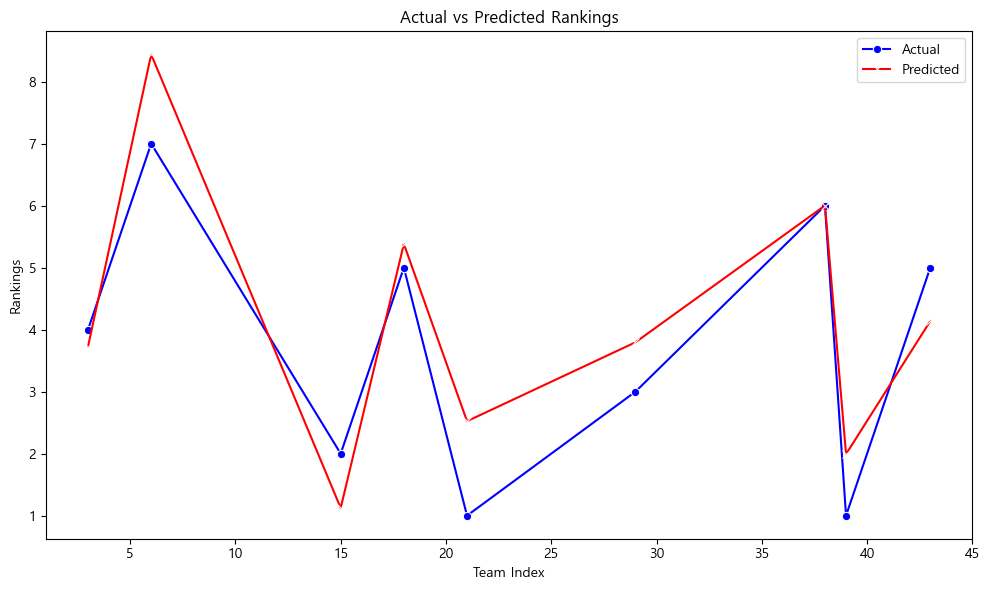

In [27]:
# 실제 순위와 예측 순위를 선 그래프로 비교
plt.figure(figsize=(10, 6))

# 실제 순위와 예측 순위를 시간 순으로 연결
sns.lineplot(x=y_test.index, y=y_test, label="Actual", color='blue', marker='o')
sns.lineplot(x=y_test.index, y=y_pred, label="Predicted", color='red', marker='x')

# 레이블과 제목 추가
plt.title('Actual vs Predicted Rankings')
plt.xlabel('Team Index')
plt.ylabel('Rankings')
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()

In [28]:
# KFold 설정
kfold = KFold(n_splits=5)

cv_r2_train = []
cv_r2_test = []
kf_ml = LinearRegression()
n_iter = 0

# x와 y를 명확히 분리 (x는 독립 변수, y는 종속 변수)
x = df.drop('순위', axis=1)  # '순위'는 종속 변수
y = df['순위']  # '순위'는 종속 변수

for train_idx, test_idx in kfold.split(x):  # x를 기준으로 train/test 인덱스 생성
    # x와 y를 인덱스를 이용해 분리
    x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # 선형 회귀 모델 학습
    kf_ml.fit(x_train, y_train)

    # 예측
    kf_pred_train = kf_ml.predict(x_train)
    kf_pred_test = kf_ml.predict(x_test)

    # 예측된 순위를 1과 7 사이로 반올림 및 클리핑
    kf_pred_train_rounded = np.round(kf_pred_train)
    kf_pred_train_clipped = np.clip(kf_pred_train_rounded, 1, 7)
    
    kf_pred_test_rounded = np.round(kf_pred_test)
    kf_pred_test_clipped = np.clip(kf_pred_test_rounded, 1, 7)

    # 결정 계수 (R²) 계산
    r2_train = np.round(r2_score(y_train, kf_pred_train_clipped), 4)
    r2_test = np.round(r2_score(y_test, kf_pred_test_clipped), 4)
    
    # 교차검증 train, test 결정 계수 확인
    n_iter += 1
    print(f'\n{n_iter} 번 train 교차 검증 R² : {r2_train}, test의 R² : {r2_test}')

    cv_r2_train.append(r2_train)
    cv_r2_test.append(r2_test)

# 평균 R² 출력
print('train 평균 R²:', np.mean(cv_r2_train))
print('test 평균 R²:', np.mean(cv_r2_test))


1 번 train 교차 검증 R² : 0.8725, test의 R² : 0.8692

2 번 train 교차 검증 R² : 0.9295, test의 R² : 0.8269

3 번 train 교차 검증 R² : 0.9006, test의 R² : 0.8125

4 번 train 교차 검증 R² : 0.8974, test의 R² : 0.7917

5 번 train 교차 검증 R² : 0.8788, test의 R² : 0.875
train 평균 R²: 0.8957599999999999
test 평균 R²: 0.83506


In [29]:
# 예측 수행
y_pred = lr.predict(x_test)

# 예측된 순위를 1부터 7까지로 반올림하고 클리핑
y_pred_rounded = np.round(y_pred)  # 반올림
y_pred_clipped = np.clip(y_pred_rounded, 1, 7)  # 1과 7 사이로 클리핑

# 예측 결과 출력
print("Actual values: ", y_test.values)  # 실제 값
print("Predicted values: ", y_pred_clipped)  # 1~7로 제한된 예측 값

# 예측 결과를 DataFrame으로 출력하여 비교하기 (팀과 실제 순위를 포함하는 경우)
result_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_clipped
})

print(result_df)

Actual values:  [4 5 6 1 2 3 4 5 6]
Predicted values:  [1. 7. 7. 1. 1. 4. 7. 6. 7.]
    Actual  Predicted
36       4        1.0
37       5        7.0
38       6        7.0
39       1        1.0
40       2        1.0
41       3        4.0
42       4        7.0
43       5        6.0
44       6        7.0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [30]:
val_data.columns

NameError: name 'val_data' is not defined

In [ ]:
drop_list = ["연속", "득점", "실점", "경기수", "세트수", "공격_시도", "공격_성공", "공격차단", "공격_범실", "서브_시도", "서브_성공", "서브_범실", "서브_세트당평균", "블로킹_순위", "블로킹_시도", "블로킹_성공", "블로킹_유효블락", "블로킹_실패", "블로킹_범실", "블로킹_어시스트", "블로킹_세트당평균"]
val = val_data.drop(columns = drop_list)

In [ ]:
# '팀'을 수치형 데이터로 변환 (예: '팀A' → 0, '팀B' → 1, '팀C' → 2)
team_mapping = {team: i for i, team in enumerate(val['팀'].unique())}
val['팀'] = val['팀'].map(team_mapping)

In [ ]:
x = val.drop("순위", axis = 1)  # 독립 변수
y = val["순위"]  # 종속 변수

In [ ]:
lr.predict(x)

In [ ]:
# 예측 수행
y_pred = lr.predict(x)

# 예측된 순위를 정렬하여 순위를 1위부터 7위까지 할당
def assign_ranks(predictions):
    # 예측값을 순위에 맞게 정렬
    sorted_indices = np.argsort(predictions)  # 예측값을 기준으로 인덱스 정렬
    ranks = np.empty_like(sorted_indices)  # 순위를 저장할 배열
    
    # 순위를 1부터 7까지 할당 (정렬된 순서대로)
    for rank, idx in enumerate(sorted_indices):
        ranks[idx] = rank + 1  # 순위는 1부터 시작
    
    return ranks

# 예측된 순위를 1부터 7까지 배정
y_pred_ranks = assign_ranks(y_pred)

# 예측 결과 출력
print("Actual values: ", y.values)  # 실제 값
print("Predicted ranks: ", y_pred_ranks)  # 배정된 순위 값

# 예측 결과를 DataFrame으로 출력하여 비교하기 (팀과 실제 순위를 포함하는 경우)
result_df = pd.DataFrame({
    'Actual': y,
    'Predicted': y_pred_ranks
})

print(result_df)

In [ ]:
df_new = df.drop(["공격_성공률", "서브_순위"], axis = 1)

In [31]:
df

,순위,팀,승점,승,패,득세트,실세트,세트득실률,점수득실률,공격_순위,공격_성공률,서브_순위
0,1,0,80,26,10,90,51,1.765,1.077,2,42.38,4
1,2,1,79,28,8,93,47,1.979,1.089,4,40.30,2
2,3,2,61,20,16,74,63,1.175,1.034,1,42.54,3
3,4,3,51,18,18,63,69,0.913,0.994,3,42.14,1
4,5,4,51,17,19,70,71,0.986,1.013,6,37.94,5
5,6,5,39,12,24,58,85,0.682,0.946,5,39.66,6
6,7,6,17,5,31,39,101,0.386,0.865,7,37.11,7
7,1,1,82,27,9,93,44,2.114,1.109,1,40.99,1
8,2,0,70,24,12,87,56,1.554,1.079,4,39.75,2
9,3,5,60,20,16,77,67,1.149,1.015,5,36.28,5
